In [2]:
# IMPORTING LIBRARIES
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import json

# DATA PREPROCESSING
# Training Image Preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset\\Fruit_vegetable_Dataset\\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset\\Fruit_vegetable_Dataset\\validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# DATA AUGMENTATION
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

# BUILDING MODEL
cnn = tf.keras.models.Sequential()

# Building Convolutional Layers
cnn.add(data_augmentation)  # Apply data augmentation
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[64, 64, 3], name='conv2d_4'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', name='conv2d_5'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, name='max_pooling2d_2'))
cnn.add(tf.keras.layers.Dropout(0.25, name='dropout_3'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', name='conv2d_6'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', name='conv2d_7'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, name='max_pooling2d_3'))
cnn.add(tf.keras.layers.Dropout(0.25, name='dropout_4'))
cnn.add(tf.keras.layers.Flatten(name='flatten_1'))
cnn.add(tf.keras.layers.Dense(units=512, activation='relu', name='dense_2'))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu', name='dense_3'))
cnn.add(tf.keras.layers.Dropout(0.5, name='dropout_5'))
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax', name='dense_4'))

# Passing a batch of data to build the model
for images, labels in training_set.take(1):
    cnn.build(input_shape=images.shape)

# COMPILING AND TRAINING PHASE
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# PRINT MODEL SUMMARY
cnn.summary()

# ... (Rest of the code)


Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 64, 64, 3)           0         
                                                                 
 conv2d_4 (Conv2D)           (32, 64, 64, 32)          896       
                                                                 
 conv2d_5 (Conv2D)           (32, 62, 62, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (32, 31, 31, 32)          0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (32, 31, 31, 32)          0         
                                                                 
 conv2d_6 (Conv2D)           (32, 31

In [8]:
# Define callbacks
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# TRAINING
history = cnn.fit(
    training_set,
    epochs=50,  # Increase the number of epochs
    validation_data=validation_set,
    callbacks=[model_checkpoint, early_stopping]
)

Epoch 1/50
98/98 [==============================] - ETA: 0s - loss: 1.2757 - accuracy: 0.5830
Epoch 1: val_accuracy improved from -inf to 0.78348, saving model to best_model.h5
98/98 [==============================] - 177s 2s/step - loss: 1.2757 - accuracy: 0.5830 - val_loss: 0.6750 - val_accuracy: 0.7835
Epoch 2/50
98/98 [==============================] - ETA: 0s - loss: 1.2555 - accuracy: 0.5978
Epoch 2: val_accuracy improved from 0.78348 to 0.80912, saving model to best_model.h5
98/98 [==============================] - 156s 1s/step - loss: 1.2555 - accuracy: 0.5978 - val_loss: 0.6916 - val_accuracy: 0.8091
Epoch 3/50
98/98 [==============================] - ETA: 0s - loss: 1.2325 - accuracy: 0.5936
Epoch 3: val_accuracy did not improve from 0.80912
98/98 [==============================] - 172s 2s/step - loss: 1.2325 - accuracy: 0.5936 - val_loss: 0.6282 - val_accuracy: 0.7977
Epoch 4/50
98/98 [==============================] - ETA: 0s - loss: 1.2285 - accuracy: 0.6006
Epoch 4: val_a

In [9]:
#EVALUATING MODEL
# Training Set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

#Validation Set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

98/98 [==============================] - 94s 886ms/step - loss: 0.7536 - accuracy: 0.7602
Training accuracy: 0.7601926326751709
11/11 [==============================] - 11s 225ms/step - loss: 0.6044 - accuracy: 0.8262
Validation accuracy: 0.8262107968330383


In [12]:
# SAVING MODEL
cnn.save('trained_model.h5')

# Access the training history
print(history.history)


{'loss': [1.2756801843643188, 1.2555127143859863, 1.2324503660202026, 1.228546380996704, 1.1709553003311157, 1.182421326637268, 1.1896560192108154, 1.1766762733459473, 1.1734471321105957, 1.1752387285232544, 1.1507378816604614, 1.1406832933425903, 1.13271963596344, 1.1166940927505493, 1.1012943983078003], 'accuracy': [0.5829855799674988, 0.5977528095245361, 0.5935794711112976, 0.6006420254707336, 0.6199036836624146, 0.6112359762191772, 0.6016051173210144, 0.615730345249176, 0.6234350204467773, 0.6051364541053772, 0.6253611445426941, 0.6202247142791748, 0.6263242363929749, 0.6247190833091736, 0.642054557800293], 'val_loss': [0.6750018000602722, 0.6915744543075562, 0.6282105445861816, 0.7861428260803223, 0.6601698994636536, 0.6801165342330933, 0.6495103240013123, 0.6349477767944336, 0.7075483798980713, 0.6044092178344727, 0.6438231468200684, 0.6343101859092712, 0.631165087223053, 0.678690493106842, 0.6124407649040222], 'val_accuracy': [0.7834757566452026, 0.809116780757904, 0.79772078990

In [15]:
# RECORDING HISTORY IN JSON  
import json
with open('training_hist.json', 'w') as f:
    json.dump(history.history, f)

print(history.history.keys())

# Calculating Accuracy of Model Achieved on Validation Set
print("Validation set Accuracy: {} %".format(history.history['val_accuracy'][-1] * 100))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Validation set Accuracy: 82.33618140220642 %


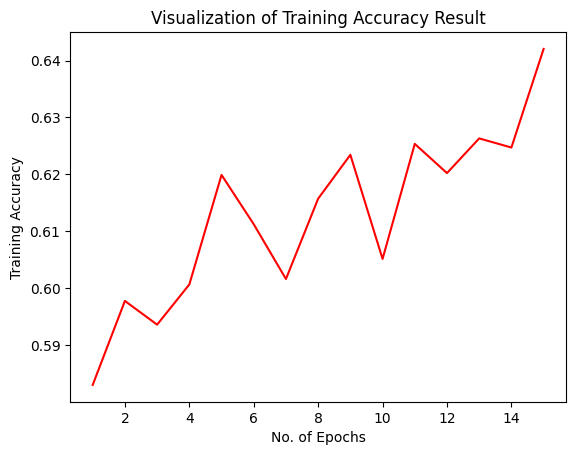

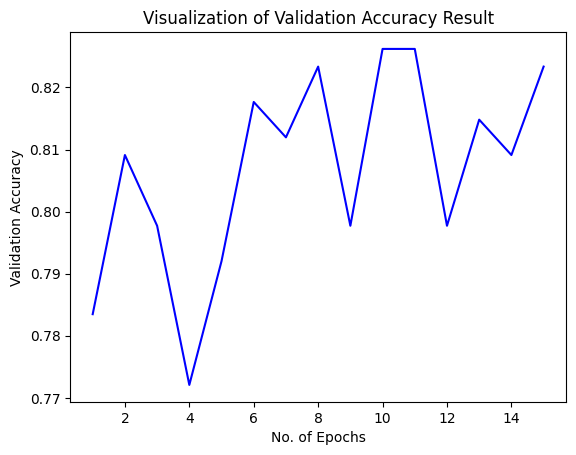

In [19]:
# ACCURACY VISUALISATION
# Training VISUALISATION
epochs = [i for i in range(1, 16)]  # Use the actual number of epochs in your training history
plt.plot(epochs, history.history['accuracy'], color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

# Validation Accuracy
plt.plot(epochs, history.history['val_accuracy'], color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()


In [20]:
#Test Set Evaluation
test_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset\\Fruit_vegetable_Dataset\\test',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None, 
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

test_loss, test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

Found 359 files belonging to 36 classes.
12/12 [==============================] - 17s 297ms/step - loss: 0.5962 - accuracy: 0.8273
Test accuracy: 0.8272980451583862
